In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer

In [156]:
# Loading Data
df = pd.read_csv("star_classification.csv")
df.head()
#print(df.head()) gives a table instead of a slider

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [157]:
df.rename(columns={'alpha':'RA',"delta":'DEC'},inplace=True) 
#if inlplace is true, it modifies the existing dataframe rather than creating a new dataframe with renamed columns
df.head()

,obj_ID,RA,DEC,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   RA           100000 non-null  float64
 2   DEC          100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

array([<AxesSubplot:title={'center':'redshift'}>], dtype=object)

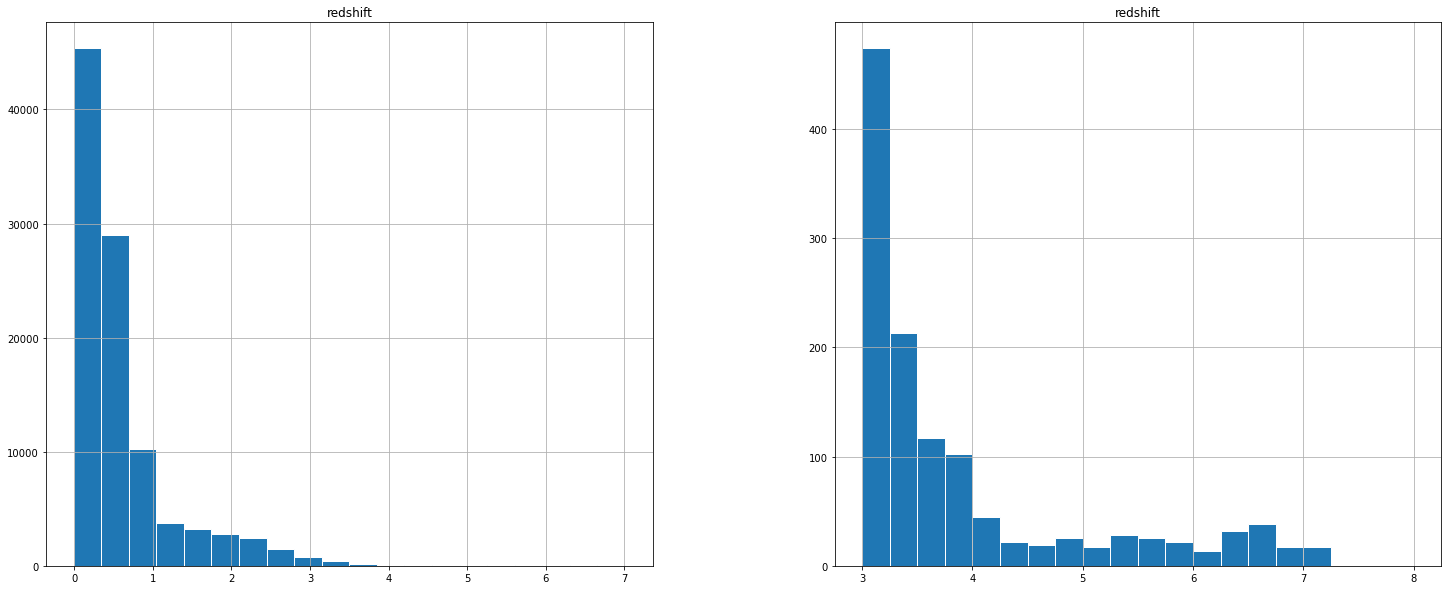

In [159]:
fig, axes = plt.subplots(1, 2,figsize=(25,10))
df.hist(column=['redshift'],bins=20,edgecolor = 'white', ax=axes[0])
df.hist(column=['redshift'],bins=20,edgecolor = 'white',range=[3,8], ax=axes[1])

([<matplotlib.patches.Wedge at 0x7f2102bb2ca0>,
 [Text(-1.098493492289193, 0.057550390079417375, 'GALAXY'),
  Text(0.8770086693444948, -0.6639697236279669, 'STAR'),
  Text(0.8913811676406629, 0.6445460526413677, 'QSO')],
 [Text(-0.5991782685213779, 0.03139112186150038, '59.44% \n  (59,445)'),
  Text(0.47836836509699715, -0.3621653037970728, '21.59% \n  (21,594)'),
  Text(0.4862079096221797, 0.3515705741680187, '18.96% \n  (18,961)')])

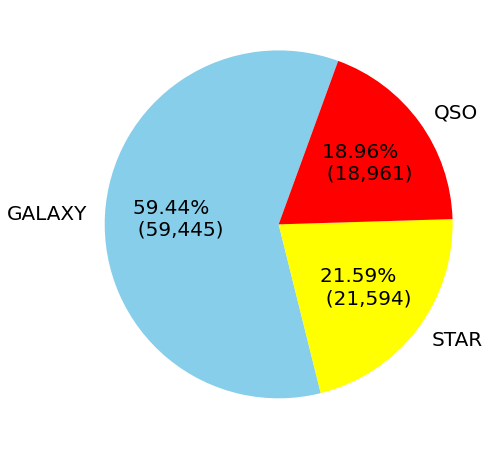

In [160]:
class_counts = df['class'].value_counts() #Calculates the number of objects in each class
index = class_counts.index #Give the unique names of the class
np.sum(class_counts)

#explode = (0.03,0.03,0.03)


plt.figure(figsize = (12, 8))
plt.pie(class_counts, autopct=lambda p : '{:.2f}% \n  ({:,.0f})'.format(p,p * sum(class_counts)/100),labels=index,colors=['skyblue','yellow','red'],textprops = {'fontsize': 20},startangle=70)

In [161]:
df.columns
drop_columns = ['obj_ID', 'RA', 'DEC','run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID','plate',
       'MJD', 'fiber_ID']
data = df.drop(drop_columns,axis=1)
data

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


In [162]:
#Check for missing data
data.isnull().values.any()  
#Output is false, No missing data

False

In [163]:
data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']
data

,u,g,r,i,z,class,redshift,u-g,g-r,r-i,i-z
0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,1.60352,1.88029,1.22928,0.37202
1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,1.94571,0.24744,1.41632,-0.44615
2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,2.59918,2.05413,1.26119,0.40030
3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,-1.63974,2.16494,1.10708,1.25444
4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,1.85690,1.08281,0.52036,0.43250
...,...,...,...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000,-0.80827,1.07182,0.59856,0.56979
99996,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895,0.30490,1.93625,0.69244,0.34233
99997,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366,1.89919,1.06569,0.51394,0.33813
99998,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040,3.71282,1.72371,0.84132,0.44772


In [167]:
data = data.drop(['u','g','r','i','z'],axis=1) #Already done
data

,class,redshift,u-g,g-r,r-i,i-z
0,0,0.634794,1.60352,1.88029,1.22928,0.37202
1,0,0.779136,1.94571,0.24744,1.41632,-0.44615
2,0,0.644195,2.59918,2.05413,1.26119,0.40030
3,0,0.932346,-1.63974,2.16494,1.10708,1.25444
4,0,0.116123,1.85690,1.08281,0.52036,0.43250
...,...,...,...,...,...,...
99995,0,0.000000,-0.80827,1.07182,0.59856,0.56979
99996,0,0.404895,0.30490,1.93625,0.69244,0.34233
99997,0,0.143366,1.89919,1.06569,0.51394,0.33813
99998,0,0.455040,3.71282,1.72371,0.84132,0.44772


In [168]:
#Redshift value is based on the increase in wavelength, so there are some negative values indicating
#the object is moving towards us. Good thing that no negative redshift is associated with quasar (Else that would be a little weird)

data['redshift'].min()
c = data[data['redshift']<0]['redshift'].count()
#print(c)
#print((c/data.shape[0])*100)
#print(data[data['redshift']<0]['redshift'])



data[data['redshift']<0]['class'].value_counts()

2    13682
0       42
Name: class, dtype: int64

In [172]:
#Numericall represent the class since it is in string format
LE = LabelEncoder()
data['class'] = LE.fit_transform(data['class'])
data['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [173]:
X,y = data.drop(['class'],axis=1),df['class']
X

,redshift,u-g,g-r,r-i,i-z
0,0.634794,1.60352,1.88029,1.22928,0.37202
1,0.779136,1.94571,0.24744,1.41632,-0.44615
2,0.644195,2.59918,2.05413,1.26119,0.40030
3,0.932346,-1.63974,2.16494,1.10708,1.25444
4,0.116123,1.85690,1.08281,0.52036,0.43250
...,...,...,...,...,...
99995,0.000000,-0.80827,1.07182,0.59856,0.56979
99996,0.404895,0.30490,1.93625,0.69244,0.34233
99997,0.143366,1.89919,1.06569,0.51394,0.33813
99998,0.455040,3.71282,1.72371,0.84132,0.44772


In [176]:
#Well, it's pretty obvious that the data is imbalanced
sm = SMOTE(random_state = 30, k_neighbors = 5) 
#k_neighbors: Number of nearest neighbors used to create the synthetic data
X, y = sm.fit_resample(X, y)
y.value_counts()

GALAXY    59445
QSO       59445
STAR      59445
Name: class, dtype: int64

In [178]:
#We can standardize or normalize the data
"""scalar = StandardScaler()
normal = Normalizer()

X = scaler.fit_transform(X)
X = normal.fit_transform(X)"""

#For now let's work on raw data and see how the model performs

#For some reason preprocessing the data lowered the accuracy by 2%

'scalar = StandardScaler()\nnormal = Normalizer()\n\nX = scaler.fit_transform(X)\nX = normal.fit_transform(X)'

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve 

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [186]:
#First let us consider the default case of 100 trees
rf = RandomForestClassifier(random_state = 42) #Calling the ML model


In [188]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [191]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

Accuracy: 0.9823


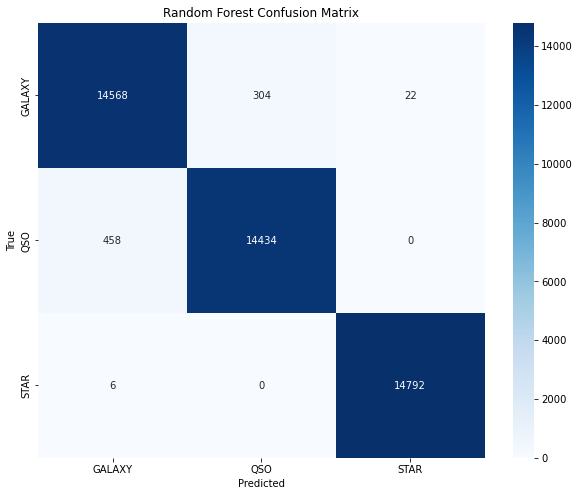

In [194]:
#Confusion matrix for 100 trees
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap = 'Blues', xticklabels = sorted(y_test.unique()), yticklabels = sorted(y_test.unique()))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [198]:
feature_importance = pd.DataFrame({'Feature': rf.feature_names_in_ ,'Importance': rf.feature_importances_})
feature_importance.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,redshift,0.614519
1,r-i,0.142768
2,g-r,0.121370
3,u-g,0.092068
4,i-z,0.029276


In [199]:
#We get a accuracy of 98.2% with 100 trees, let's see from 1-100
rforest_top = pd.DataFrame(columns = ['Neighbors','Test Accuracies'])

for i in range(1,100):   #This loop is gonna take a crazy amount of time. Will this PC even handle it?
    rforest = RandomForestClassifier(n_estimators = i, random_state = 42)
    rforest.fit(X_train, y_train)
    accuracy = rforest.score(X_test, y_test)
    rforest_top.loc[len(rforest_top)] = [i, accuracy]
    
rforest_top.sort_values(by = 'Test Accuracies', ascending = False).head().reset_index(drop = True)

,Neighbors,Test Accuracies
0,41.0,0.982595
1,57.0,0.982595
2,50.0,0.982527
3,59.0,0.982527
4,87.0,0.982527


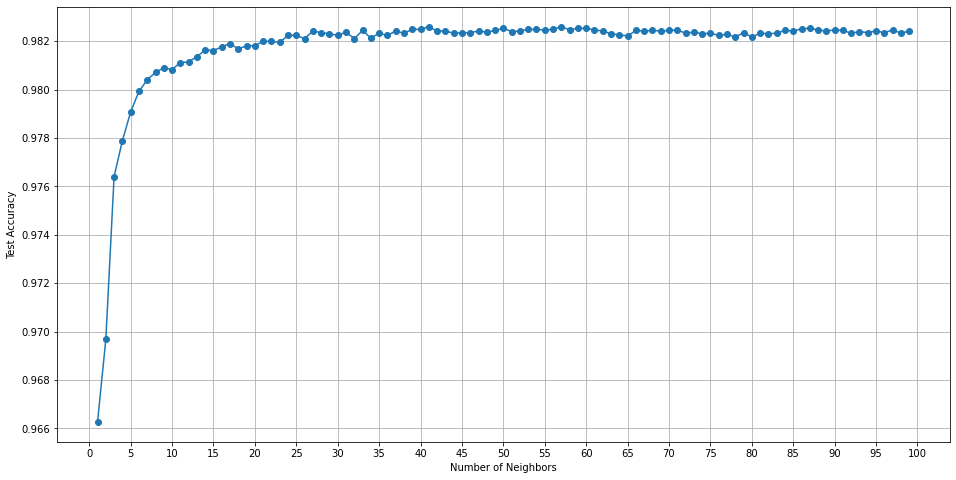

In [204]:
plt.figure(figsize = (16, 8))
plt.plot(rforest_top['Neighbors'], rforest_top['Test Accuracies'], marker = 'o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(rotation = 0, ticks = range(0, 101, 5))
plt.grid(True)
plt.show()

In [230]:
rforest = RandomForestClassifier(n_estimators = 41, random_state = 42)
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=41, random_state=42)

In [234]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

Accuracy: 0.9776


In [235]:
#Support Vector Machines
from sklearn.svm import SVC

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 30)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [244]:
for i in kernel:
    model_svc=SVC(kernel=i)
    model_svc.fit(X_train,y_train)
    y_pred=model_svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{i} Kernel: {np.round(accuracy,4) * 100}%")

print('Done')

linear Kernel: 95.43%
poly Kernel: 93.72%
rbf Kernel: 96.06%
sigmoid Kernel: 64.9%
Done


In [ ]:
#Looks like rbf (default) kernel provide the best model